### 习题 3.7

已知函数数据表

| $x_i$    | 1.1    | 1.3    | 1.5    |
| -------- | ------ | ------ | ------ |
| $f(x_i)$ | 3.0042 | 3.6693 | 4.4817 |

试分别用梯形积分公式和辛普森积分公式计算$\int_{1.1}^{1.5}f(x)dx$, 并与积分$\int_{1.1}^{1.5}e^xdx$比较

In [7]:
import numpy as np

# 给定数据表
x = [1.1, 1.3, 1.5]
f = [3.0042, 3.6693, 4.4817]

# 梯形积分计算
a = 1.1
b = 1.5
n = 2  # 区间等分成2个小区间
h = (b - a) / n

trap_integral = (h/2) * (f[0] + f[-1] + 2*sum(f[1:-1]))
print(f"梯形积分结果: {trap_integral:.4f}")

梯形积分结果: 1.4824


In [8]:
# 辛普森积分计算
a = 1.1
b = 1.5
n = 2  # 区间等分成2个小区间
h = (b - a) / n

simpson_integral = (h/3) * (f[0] + f[-1] + 4*sum(f[1:-1:2]) + 2*sum(f[2:-2:2]))
print(f"辛普森积分结果: {simpson_integral:.4f}")

辛普森积分结果: 1.4775


In [4]:
# 解析积分计算
a = 1.1
b = 1.5
ana_integral = (np.exp(b) - np.exp(a))
print(f"解析积分结果: {ana_integral:.4f}")

解析积分结果: 1.4775


### 习题 17

以大角度振动单摆的振动周期是：
$$ T = \frac{2T_0}{\pi} \int_0^{\frac{\pi}{2}}{\frac{d\theta}{\sqrt{1 - \sin^2(\frac{\theta_0}{2}) \sin^2 \theta}} }$$
式中，$T_0 = 2\pi\sqrt{l/g}$ 是摆角幅值 $\theta_0$ 很小时单摆振动的周期，$m$ 为摆球质量，$l$ 为摆长，$g$ 为重力加速度。试用变步长梯形积分方法计算数值积分(要求精度为 $10^{-5}$).

1. 分别求出当$\theta_0 (^\circ)$为[1,3,5,7,10,15,20,25]时对应的$T/T_0$的值，
2. 确定 $|T - T_0|/T_0 = 0.05$ 时，$\theta_0$ 的近似值。

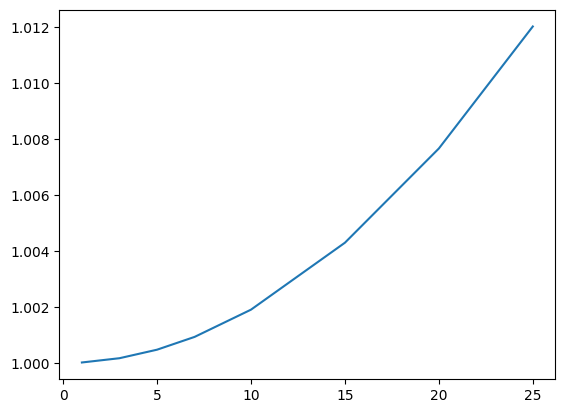

In [48]:
import numpy as np, matplotlib.pyplot as plt
def trapezoid(f,a,b,N,theta0):
    h = (b-a)/N
    s = 0.5*f(a,theta0) + 0.5*f(b,theta0)
    for k in range(1,N):
        s += f(a+k*h,theta0)
    return(h*s)
#Adaptive integration
def ada_int(f, a, b, tol=1.0e-5, n=5, N=10, theta0=1):
    area = trapezoid(f, a, b, N, theta0) #梯形积分函数
    check = trapezoid(f, a, b, n, theta0)
    if abs(area - check) > tol: #3\epsilon
        # bad accuracy, add more points to interval
        m = (b + a) / 2.0
        area = ada_int(f, a, m, theta0) + ada_int(f, m, b, theta0)
    return area
def f(theta, theta0):
    return 2 / np.sqrt(1 - np.sin(theta0/2)**2 * np.sin(theta)**2)/np.pi


theta0 = np.array([1,3,5,7,10,15,20,25])*np.pi/180.

l = 1
g = 9.8
T0 = 2*np.pi*np.sqrt(l/g)
T2T0 = np.zeros_like(theta0)
for i, each in enumerate(theta0):
    T2T0[i] = ada_int(f, 0, np.pi/2, theta0 = each)

plt.plot(np.rad2deg(theta0), T2T0)


In [49]:
t2t0 = 2
theta = 25
while np.abs(t2t0-1-0.05)>1e-3:
    t2t0 = ada_int(f,0,np.pi/2,theta0=theta*np.pi/180)
    theta = theta + 1
print(theta-1)
print(t2t0)

50
1.0497829606230324
